# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

# Introduction

The NBA has long been celebrated for its competitive spirit and strategic depth. In this project, I analyze historical NBA game data from 2004 to 2021 to explore the concept of home-court advantage. The analysis focuses on field goal percentages, total wins, and win percentages to uncover trends and patterns. I aim to evaluate how home-court advantage has influenced game outcomes and whether its impact has evolved over time.



In [2]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Loading the data
nba_games = read_csv("nba_games.csv")
nba_games

Rows: 23335 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): season, team_home, team_away
dbl  (14): game_id, pts_home, fg_pct_home, pct_3p_home, ft_pct_home, ast_hom...
date  (1): game_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


game_id,game_date,season,team_home,team_away,pts_home,fg_pct_home,pct_3p_home,ft_pct_home,ast_home,reb_home,pts_away,fg_pct_away,pct_3p_away,ft_pct_away,ast_away,reb_away,home_team_win
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10400064,2004-10-22,2004-05,Golden State Warriors,Denver Nuggets,86,0.405,0.300,0.792,15,39,105,0.483,0.364,0.739,29,41,0
10400065,2004-10-22,2004-05,Charlotte Hornets,Portland Trail Blazers,69,0.377,0.300,0.571,24,36,63,0.311,0.217,0.741,9,44,1
10400066,2004-10-22,2004-05,Minnesota Timberwolves,New York Knicks,102,0.523,0.143,0.643,32,46,82,0.333,0.154,0.778,21,41,1
10400067,2004-10-22,2004-05,Utah Jazz,Sacramento Kings,103,0.507,0.667,0.641,25,43,88,0.362,0.250,0.814,16,33,1
10400068,2004-10-22,2004-05,Boston Celtics,Brooklyn Nets,83,0.431,0.273,0.706,14,34,96,0.449,0.231,0.885,21,35,0
10400069,2004-10-22,2004-05,Los Angeles Lakers,Los Angeles Clippers,113,0.465,0.533,0.800,20,46,94,0.357,0.400,0.800,22,43,1
10400070,2004-10-22,2004-05,Atlanta Hawks,Miami Heat,82,0.403,0.111,0.657,20,36,113,0.582,0.357,0.652,16,43,0
10400071,2004-10-22,2004-05,Detroit Pistons,Washington Wizards,100,0.549,0.500,0.810,24,34,82,0.411,0.071,0.724,15,33,1
10400072,2004-10-23,2004-05,Orlando Magic,Houston Rockets,95,0.481,0.364,0.773,20,37,72,0.385,0.000,0.759,12,38,1


### Field Goal Percentage Trends

The first visualization compares the average field goal percentages (FG%) of home and away teams across seasons from 2004 to 2021. The data reveals that home teams consistently exhibit higher FG% compared to away teams, suggesting a performance advantage associated with playing on their home court. Interestingly, the gap between home and away FG% appears relatively stable over time until recent years, where the gap seems to close a bit.

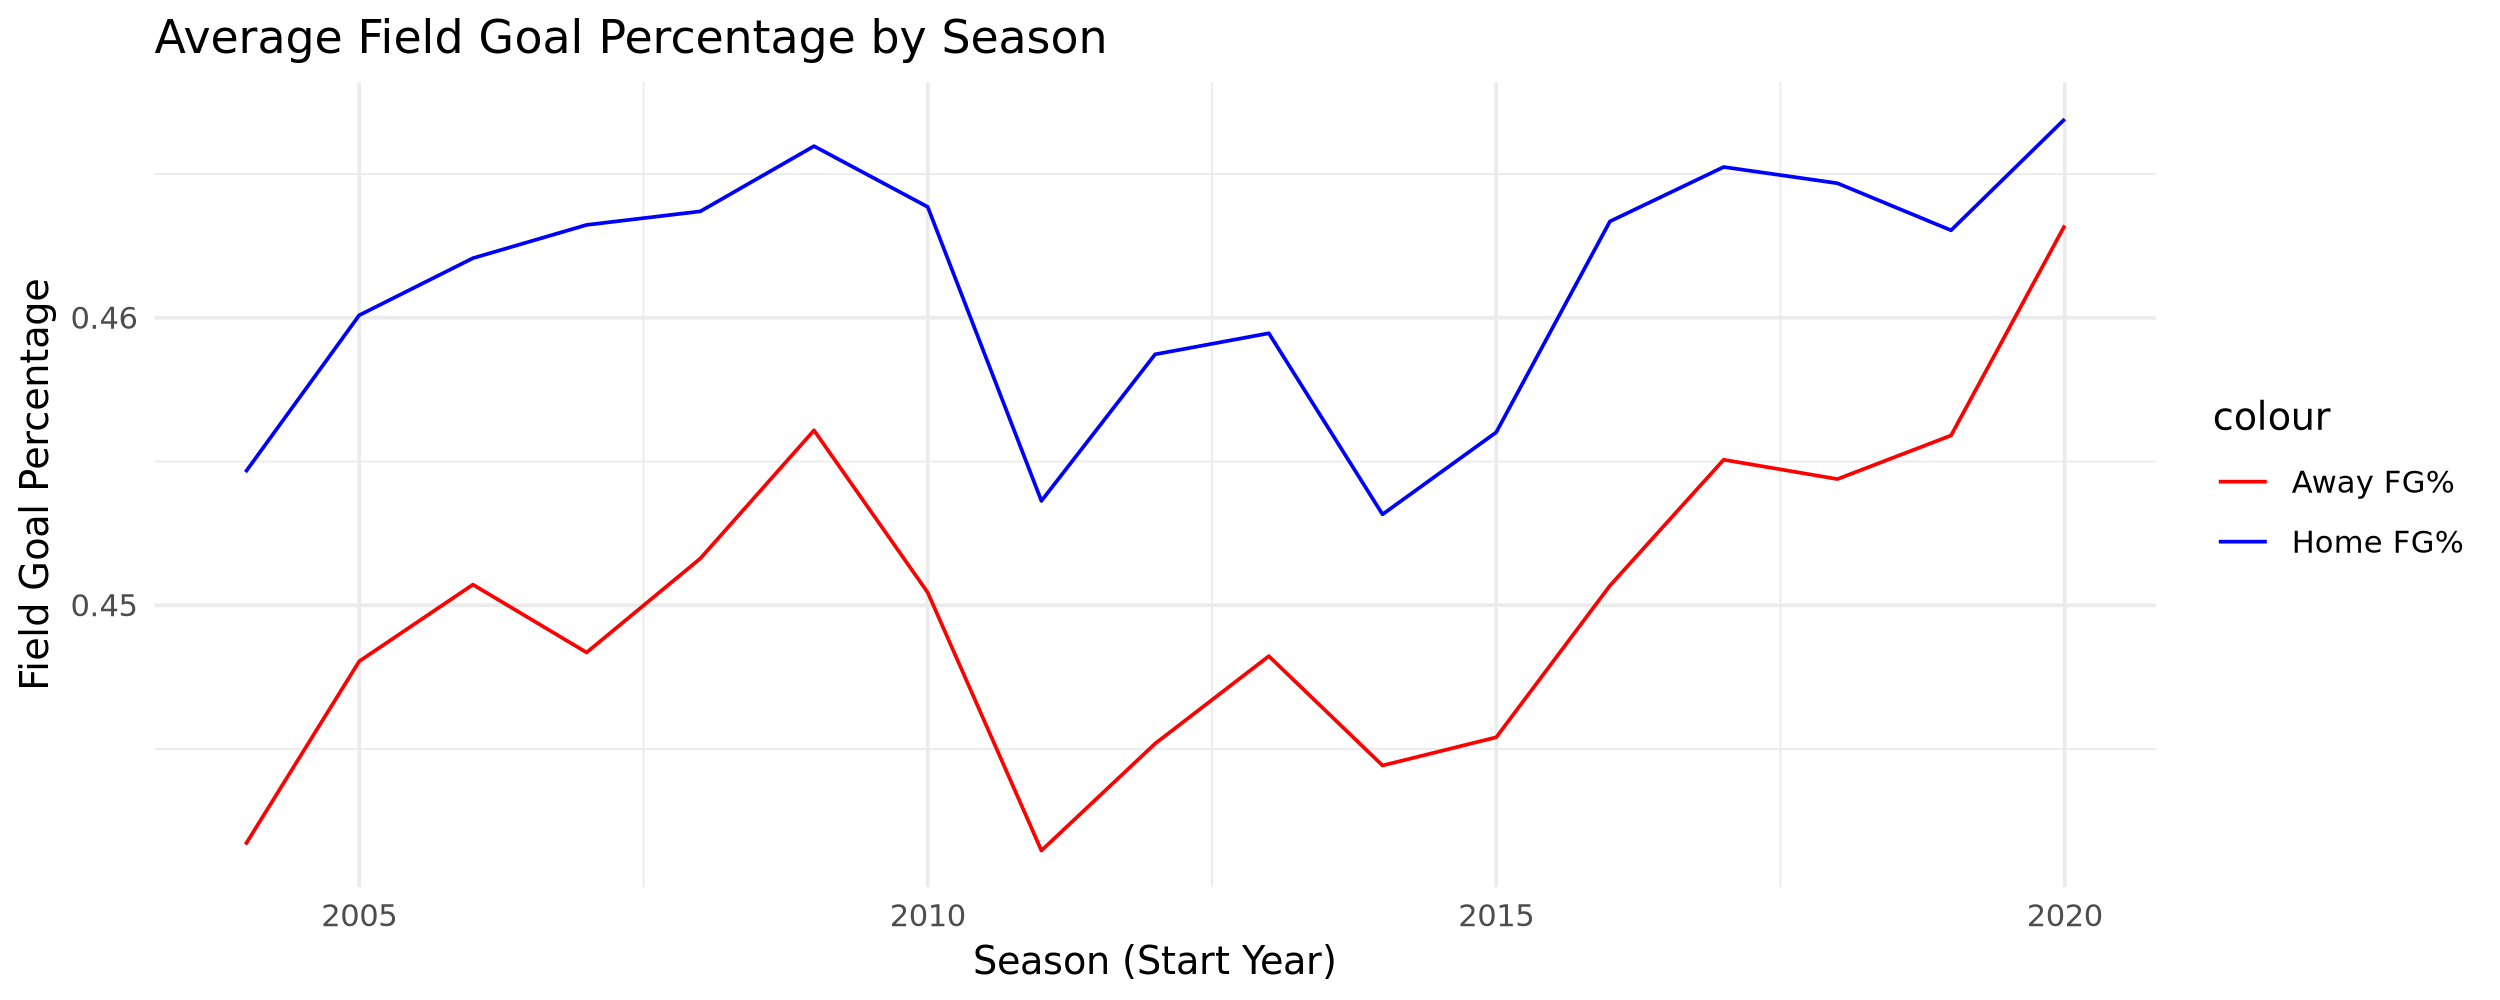

In [9]:
# Compare average field goal percentage by away and home teams over time by season
options(repr.plot.width = 10,repr.plot.height = 4)
nba_summary = nba_games |>
    group_by(season) |>
    summarize(
        avg_fg_home = mean(fg_pct_home, na.rm = TRUE),
        avg_fg_away = mean(fg_pct_away, na.rm = TRUE)
    ) |>
    mutate(season_numeric = as.numeric(substr(season, 1, 4)))


ggplot(nba_summary, aes(x = season_numeric)) +
    geom_line(aes(y = avg_fg_home, color = "Home FG%")) +
    geom_line(aes(y = avg_fg_away, color = "Away FG%")) +
    labs(title = "Average Field Goal Percentage by Season",
        x = "Season (Start Year)",
        y = "Field Goal Percentage",
   ) +
    theme(
        title = element_text(size = 18),
        legend.text = element_text(size = 14), 
        axis.text = element_text(size = 12),   
        axis.title = element_text(size = 16)  
    ) +
    theme_minimal() +
    scale_color_manual(
        values = c("Home FG%" = "blue", "Away FG%" = "red")
    )



### Total Wins Analysis

The second visualization examines total wins by home and away teams for each season. Home teams consistently secure more victories than away teams, reinforcing the significant impact of home-court advantage. However, certain seasons show a narrower win gap. This pattern highlights the variability of home-court influence in different contexts.

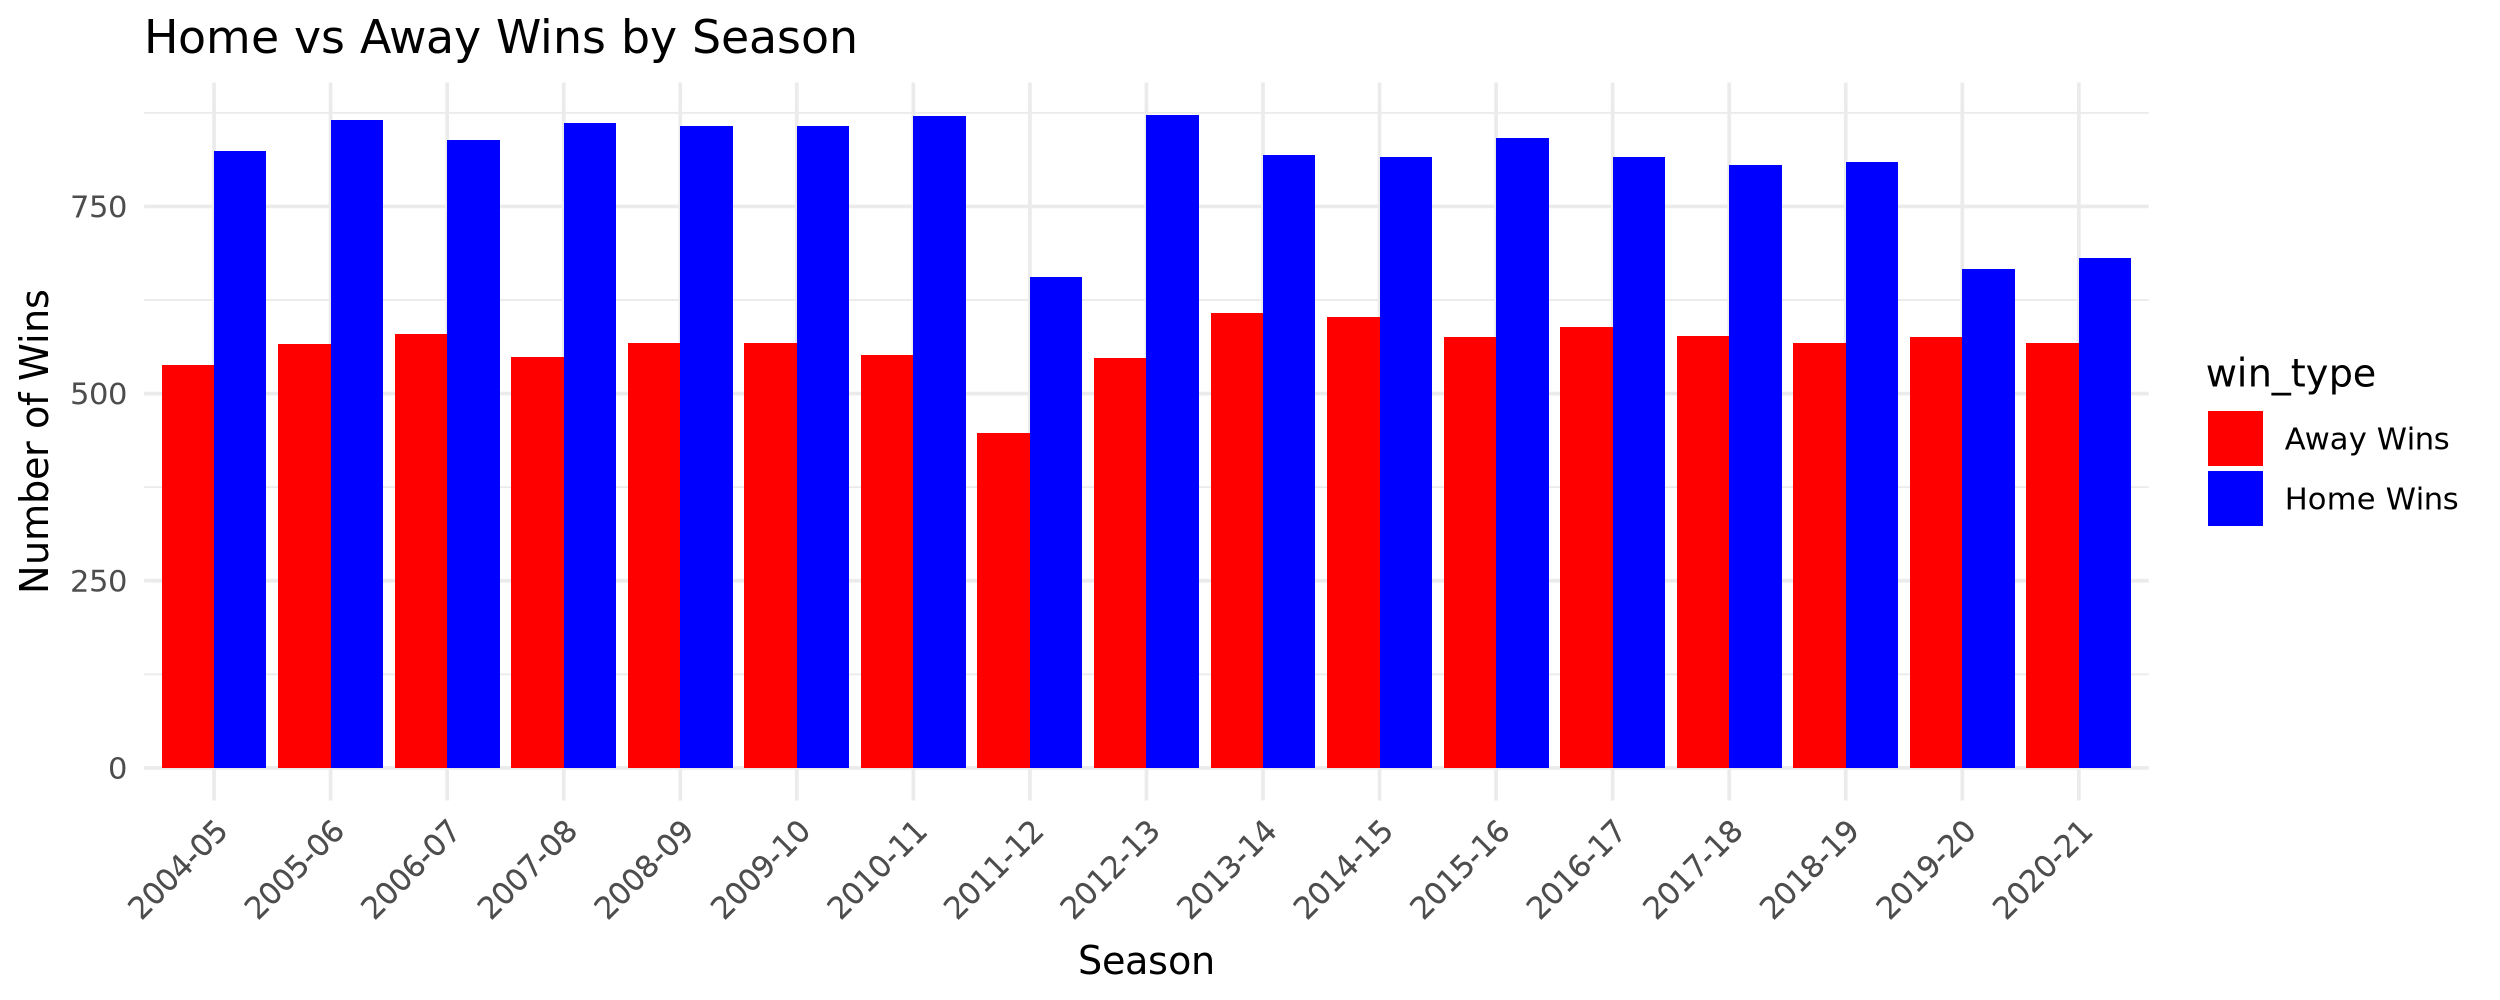

In [5]:
# Display Home vs Away Total Wins
options(repr.plot.width = 10,repr.plot.height = 4)

wins_by_season = nba_games |>
  group_by(season) |>
  summarize(
    home_wins = sum(home_team_win, na.rm = TRUE),
    away_wins = n() - sum(home_team_win, na.rm = TRUE)
  ) |>
  pivot_longer(cols = c(home_wins, away_wins), names_to = "win_type", values_to = "wins")

ggplot(wins_by_season, aes(x = season, y = wins, fill = win_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Home vs Away Wins by Season",
    x = "Season",
    y = "Number of Wins",
  ) +
  scale_fill_manual(values = c("home_wins" = "blue", "away_wins" = "red"),
                    labels = c("Away Wins", "Home Wins")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Win Percentages

The final visualization focuses on home and away win percentages over time, providing a more granular perspective. Home win percentages consistently surpass away win percentages, although the margin fluctuates between seasons.

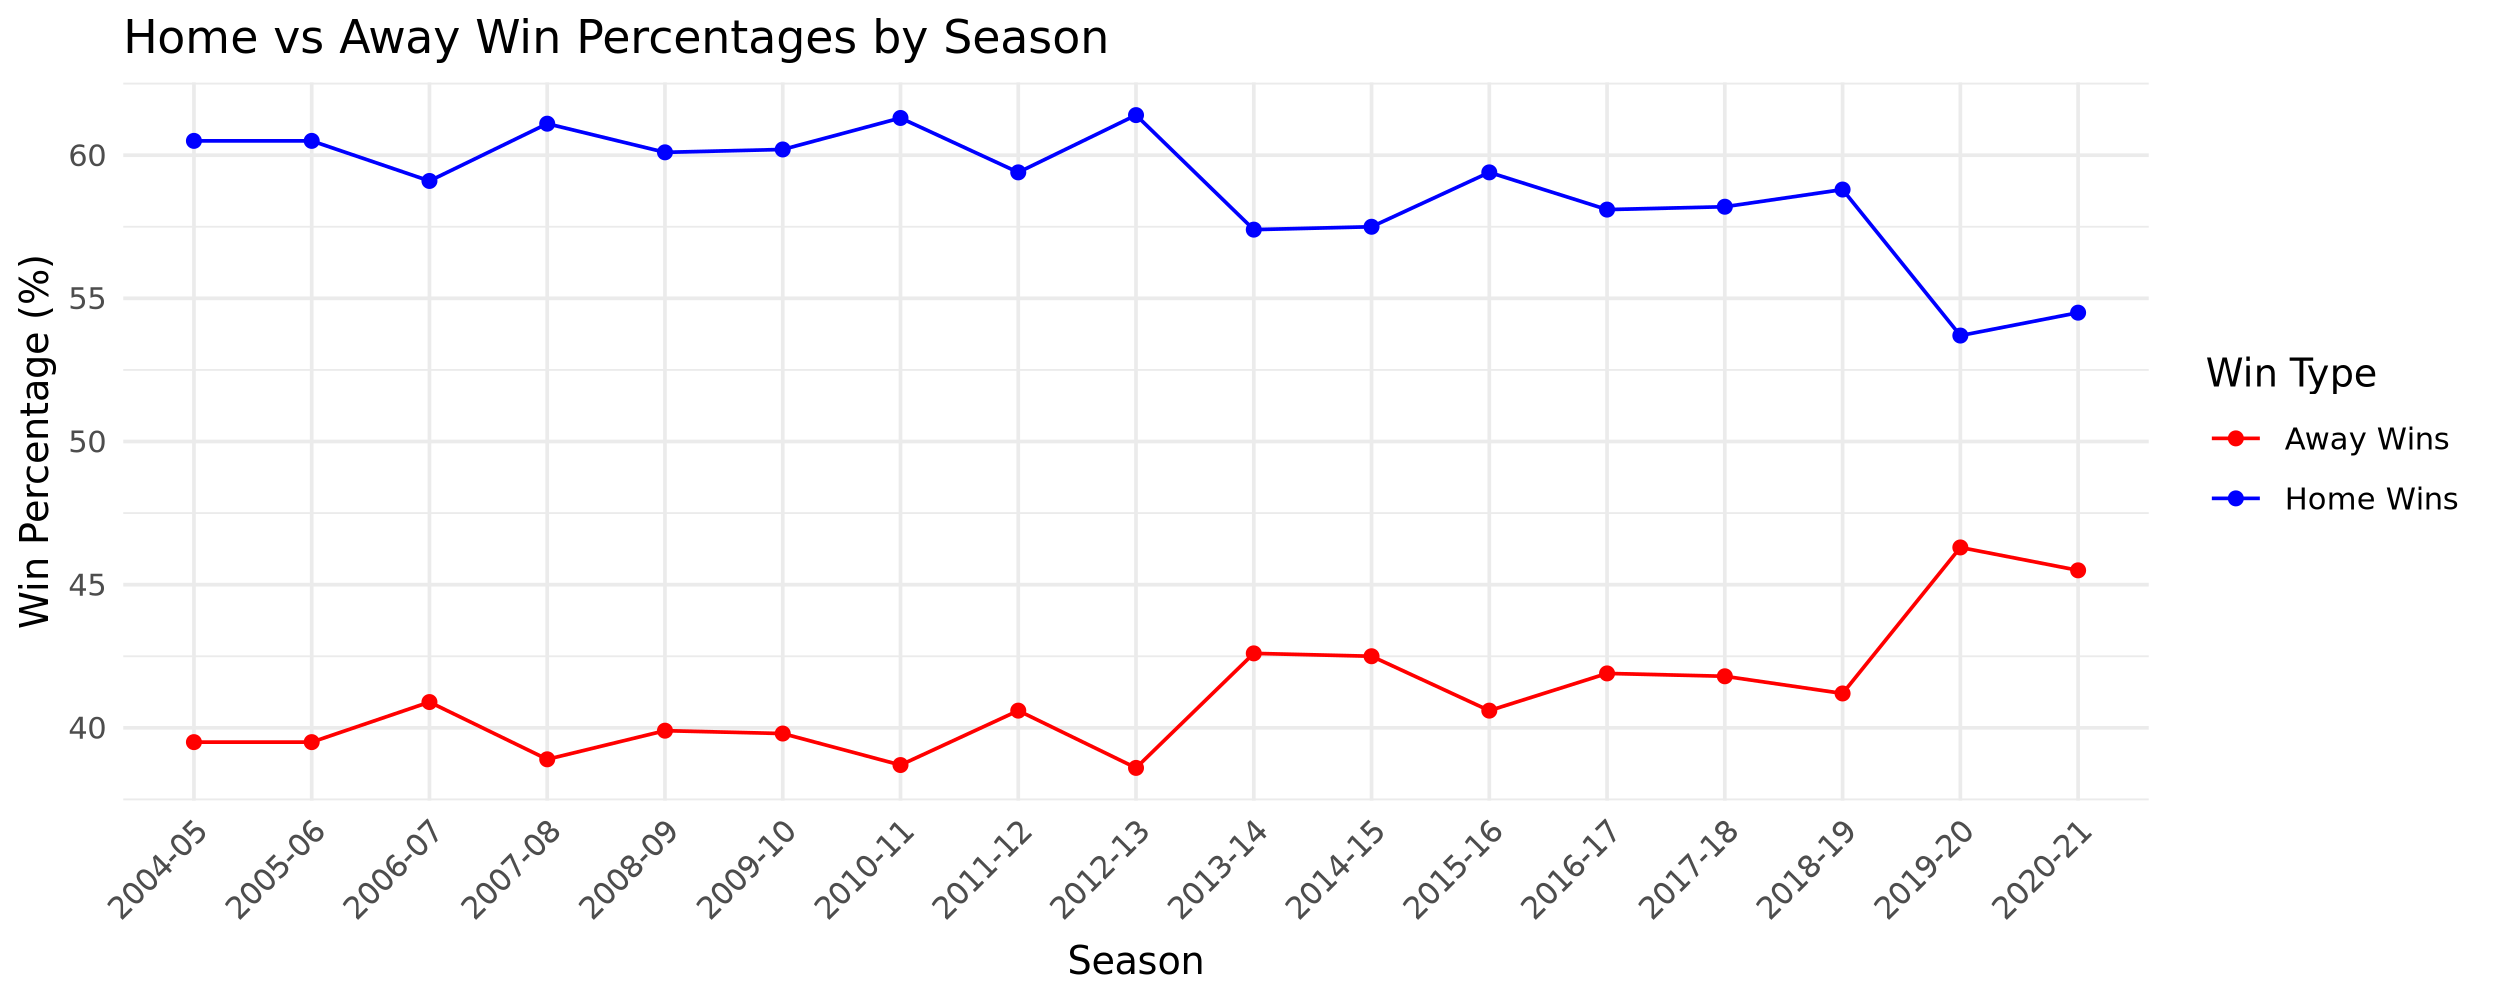

In [10]:
# Display Home vs Away Win Percentages by Year
wins_by_season = nba_games |>
  group_by(season) |>
  summarize(
    total_games = n(),
    home_wins = sum(home_team_win, na.rm = TRUE),
    away_wins = total_games - home_wins,
    home_win_pct = round((home_wins / total_games) * 100, 1),
    away_win_pct = round((away_wins / total_games) * 100, 1)
  ) |>
  pivot_longer(cols = c(home_win_pct, away_win_pct), names_to = "win_type", values_to = "win_pct")


ggplot(wins_by_season, aes(x = season, y = win_pct, color = win_type, group = win_type)) +
  geom_line() +  
  geom_point() + 
  labs(
    title = "Home vs Away Win Percentages by Season",
    x = "Season",
    y = "Win Percentage (%)",
    color = "Win Type"
  ) +
  scale_color_manual(
    values = c("home_win_pct" = "blue", "away_win_pct" = "red"),
    labels = c("Away Wins", "Home Wins")
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Conclusion


Overall, the analysis confirms that home-court advantage significantly affects NBA game outcomes. Home teams consistently perform better in terms of field goal efficiency and total wins. The fluctuations and reduced gap between home and away team tends, especially in recent years, could be attributed to changes in league dynamics, team competitiveness, or external factors like rule modifications. Improved travel conditions in recent years could also influence this shift, but home-court advantage seems to continue to prevail with court familiarity and supportive crowd energy. This project highlights the importance of environmental and psychological factors in professional basketball, paving the way for future investigations into player-level data or contextual influences like travel schedules.